<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Luisa María Morales Sánchez

Universidad de Antioquia

Métodos Computacionales

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```



In [ ]:
#Librerias
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
import pandas as pd

In [ ]:
"""
Parámetros iniciales:
theta: Ángulo de desplazamiento (en radianes).
omega: Velocidad angular (en radianes/segundo).
g: Aceleración debida a la gravedad (en m/s²).
L: Longitud del hilo del péndulo (en metros).
gamma: Constante de amortiguamiento
m = masa del pendulo (en Kg)
"""
g = 9.8
L = 1.0
m = 5
gamma = 0.2
t = np.linspace(0,10,600)

def fun(h, t, g, L,gamma):
    theta, omega = h
    dtheta_dt = omega
    domega_dt = -((g/L)*theta) - gamma*L*omega
    return np.array([dtheta_dt, domega_dt])

theta_0 = 5*np.pi/4 #Ángulo inical
omega_0 = 0.0 #Velocidad angular, empieza en reposo
h0 = [theta_0,omega_0]


In [ ]:
#Método euler
def euler(fun,h0,t):
  dt = t[1] - t[0]
  N = len(t)
  U = np.zeros((N, 2 ))
  U[0] = h0

  for i in range(0, N-1):
    U[i+1] = U[i] + dt*fun(U[i],g,L,gamma,t[i])
  return U

meth_euler = euler(fun,h0,t)
print('Metodo Euler')
np.round(meth_euler, 4)


Metodo Euler


array([[ 3.9270e+00,  0.0000e+00],
       [ 3.9270e+00, -3.2780e-01],
       [ 3.9215e+00, -6.5560e-01],
       ...,
       [-3.6400e-02, -6.0000e-03],
       [-3.6500e-02, -2.7000e-03],
       [-3.6600e-02,  4.0000e-04]])

In [ ]:
#Método Runge-Kutta
def RK4(fun,h0,t):
  dt = t[1] - t[0]
  N = len(t)
  V = np.zeros([N,len(h0)])
  V[0] = h0
  for i in range(N-1):
    k1 = fun(V[i],g,L,gamma,t[i])
    k2 = fun(V[i] + dt/2. * k1,g,L,gamma, t[i] + dt/2.)
    k3 = fun(V[i] + dt/2. * k2,g,L,gamma, t[i] + dt/2.)
    k4 = fun(V[i] + dt    * k3,g,L,gamma, t[i] + dt)
    V[i+1] = V[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
  return V

RK = RK4(fun,h0,t)
print('Metodo Rugen-kutta')
np.round(RK4(fun,h0,t),4)

Metodo Rugen-kutta


array([[ 3.927 ,  0.    ],
       [ 3.9243, -0.3277],
       [ 3.9161, -0.6549],
       ...,
       [-0.0222, -0.0148],
       [-0.0224, -0.0125],
       [-0.0226, -0.0102]])

In [ ]:
#Método de integracion con Odeint
solution = odeint(fun, h0, t, args=(g, L,gamma))
np.round(solution,4)

array([[ 3.927 ,  0.    ],
       [ 3.9216, -0.6411],
       [ 3.9056, -1.2783],
       ...,
       [ 1.4002,  1.0413],
       [ 1.4157,  0.8078],
       [ 1.4272,  0.5729]])

In [ ]:
#Solución teorica para Theta en funcion del tiempo
a = np.sqrt((4*g/L)-gamma**2)
def sol_teorica(t,theta_0,gamma,a):
  b = theta_0*np.exp(-gamma*t/2)
  c = np.cos(t*a/2)+(gamma/a)*np.sin(t*a/2)
  return b*c

theta_t = sol_teorica(t,theta_0,gamma,a)

In [ ]:
d = {'Tiempo (t)': t, 'Angulo': solution[:,0],'Velocidad Angular': solution[:,1]}
df = pd.DataFrame(data=d)
df

,Tiempo (t),Angulo,Velocidad Angular
0,0.000000,3.926991,0.000000
1,0.016694,3.921635,-0.641116
2,0.033389,3.905606,-1.278347
3,0.050083,3.878984,-1.909969
4,0.066778,3.841875,-2.534279
...,...,...,...
595,9.933222,1.357745,1.501424
596,9.949917,1.380906,1.272710
597,9.966611,1.400224,1.041288
598,9.983306,1.415662,0.807800


Text(0.5, 0.98, 'Pendulo Simple Con Fricción')

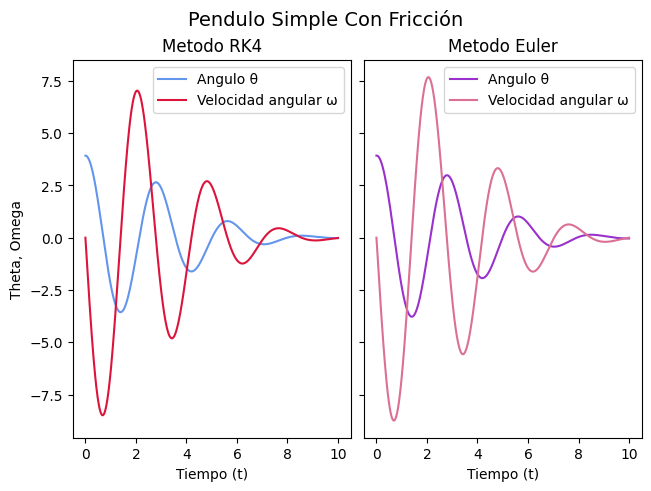

In [ ]:
#Gráfica de los metodos de Euler y Rugenkutta para el pendulo simple con fricción
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(t, RK[:,0],color='cornflowerblue',label="Angulo θ")
ax1.plot(t, RK[:,1],color='crimson',label="Velocidad angular ω")
ax1.set_title('Metodo RK4')
ax1.set_xlabel('Tiempo (t)')
ax1.set_ylabel('Theta, Omega')
ax1.legend()

ax2.plot(t, meth_euler[:,0],color='darkorchid',label="Angulo θ")
ax2.plot(t, meth_euler[:,1],color='palevioletred',label="Velocidad angular ω")
ax2.set_xlabel('Tiempo (t)')
ax2.set_title('Metodo Euler')
ax2.legend()
fig.suptitle('Pendulo Simple Con Fricción', fontsize=14)

*Energía Cinetica, Potencial y Total*
\begin{equation}
    E_c = \frac{1}{2}mL^2ω^2 \\
    E_p = mgL(1-cos(θ)) \\
    E_t = E_c + E_p
\end{equation}

In [ ]:
def E_cinetica(omega,L):
  return (1/2)*m*L**2*omega**2

def E_potencial(theta,g,l):
  return m*g*L*(1-np.cos(theta))

E_c = E_cinetica(solution[:,1],L)
E_p = E_potencial(solution[:,0],g,L)
E_total = E_c + E_p
E_total

array([ 83.64823228,  84.86087576,  88.46662021,  94.39099603,
       102.52477943, 112.72414342, 124.81091904, 138.57314973,
       153.76624697, 170.11502229, 187.31691481, 205.04669578,
       222.96287188, 240.71590473, 257.95819902, 274.35561432,
       289.60005511, 303.42242443, 315.60504629, 325.99250564,
       334.49979184, 341.11670834, 345.90770301, 349.00661997,
       350.60632166, 350.94365279, 350.28074489, 348.88412456,
       347.00341934, 344.8515936 , 342.58857078, 340.3097911 ,
       338.04076139, 335.73804009, 333.2964207 , 330.56146329,
       327.34600244, 323.44894138, 318.67451657, 312.85031114,
       305.84256446, 297.5677227 , 287.99964398, 277.17233289,
       265.17849959, 252.16455441, 238.32286179, 223.88216536,
       209.0970838 , 194.23748096, 179.57836146, 165.39076703,
       151.93396523, 139.44906171, 128.15402859, 118.24004017,
       109.86894549, 103.17167024,  98.24733677,  95.16290566,
        93.95317261,  94.6209953 ,  97.13766892, 101.44

***Animación con metodo Rugen-Kutta***

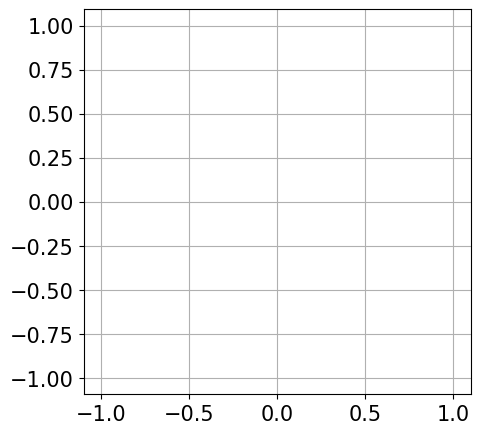

In [ ]:
import matplotlib.animation as animation


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

frame = [] #Lista que almacena lineas y textos en cada frame
for i in range(len(RK)):
    pend, = ax.plot([0, np.sin(RK[i, 0])], [0, -np.cos(RK[i, 0])],
                  color='mediumpurple', lw=2) #Dibujo de la linea, usando la posicion de theta
    time = ax.text(-1, 0.9, 'tiempo = %.1fs' % t[i]) #Tiempo de oscilacion
    frame.append([pend, time]) #Linea y tiempo agregado a cada frame
ax.set_aspect('equal', 'datalim') #Igual escala en los dos ejes
ax.grid()
ani = animation.ArtistAnimation(fig, frame, interval=50) #Animación con intervalo de 50 milisegundos

fn = 'Animacion_pendulo'
ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50) #Animación guardada en MP4
ani.save(fn+'.gif',writer='imagemagick',fps=1000/50) #Animación guardada en GIF

plt.rcParams['animation.html'] = 'html5'
ani

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?

  R/= Entre más tiempo pasa, las oscilasiones se ven afectadas por la fricción y el pendulo se va frenando, disminuyen los oscilaciones y la velocidad angular.

2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$

  R/= Si el ángulo de partida del pendulo es muy grande el angulo no se aproxima a la representación del seno del angulo. El angulo de las oscilaciones del pendulo es mucho más grande que el seno de este.

3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$

  R/= Cuando L crece y el angulo es el mismo, el pendulo oscila por más tiempo. En el caso del ángulo variante y L constante, entre más grande sea el angulo de partida el pendulo oscila por menos tiempo.

4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?

  R/= La energía del sistema no se conserva por la fuerza presente como la fricción, que con el paso del tiempo va deteniendo el pendulo y provoca la perdida de energía total.

5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?

  R/= El metodo euler es mucho más sencillo que el metodo Rugen-Kutta a la hora de plantearlo, por su sencilles el metodo resulta menos preciso. El metodo Rugen-Kutta es más preciso por lo que se ve en los resultados numéricos, por su complejidad y numero de iteraciones.
